In [5]:
import numpy as np
import pandas as pd

In [6]:
df= pd.read_csv('jobs_dataset.csv')
df.head()

,company,rating,location,positionName,description,salary,url,jobType/0,jobType/1,jobType/2,jobType/3,searchInput/country,searchInput/position,externalApplyLink
0,Google,4.3,"San Bruno, CA","Senior Data Scientist, Research, YouTube Search",Note: By applying to this position you will ha...,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.google.com/about/careers/applicati...
1,BAXTER,3.7,"Milwaukee, WI 53214",Senior AI Engineer - Data Scientist,This is where you save and sustain lives\n\nAt...,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://jobs.baxter.com/en/job/-/-/152/8298788...
2,Meta,4.2,"Redmond, WA","Audio Software Engineer, Applied Scientist","Redmond, WA • + 2 more•Full Time\nMessenger\nM...",$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/3101204833367...
3,Meta,4.2,"Bellevue, WA 98005","Software Engineer, Machine Learning","Bellevue, WA • Full Time\nMeta\nSoftware Engin...","$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://www.metacareers.com/jobs/1096352489054...
4,Lockheed Martin,4.0,"Shelton, CT 06484",AI / Machine Learning Research Engineer (early...,"Job ID: 694362BR\nDate posted: May. 22, 2025\n...",NaN,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,Full-time,NaN,NaN,NaN,US,Data Scientist,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...



✅ Model Comparison Results:
Linear Regression: MSE = 1.690, R² = 0.001
Decision Tree: MSE = 2.420, R² = -0.431
Random Forest: MSE = 1.514, R² = 0.105
KNN Regressor: MSE = 2.048, R² = -0.211
SVR: MSE = 1.854, R² = -0.096


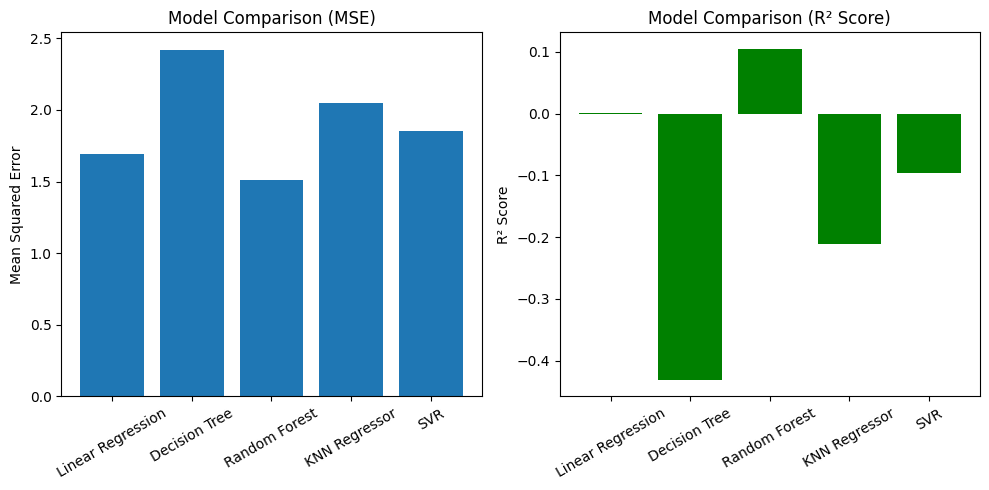


Example Prediction (Random Forest):
Actual Rating: 3.8
Predicted Rating: 3.4430000000000014


C:\Users\FORMAT\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Preprocessing ---
df = df.drop(columns=[
    'url', 'externalApplyLink', 'description', 'salary'
], errors='ignore')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)

label_cols = [
    'company', 'location', 'positionName',
    'searchInput/country', 'searchInput/position'
]

encoder = LabelEncoder()
for col in label_cols:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col].astype(str))

jobtype_cols = ['jobType/0','jobType/1','jobType/2','jobType/3']
if all(col in df.columns for col in jobtype_cols):
    df['jobType'] = df[jobtype_cols].astype(str).agg('-'.join, axis=1)
    df = df.drop(columns=jobtype_cols, errors='ignore')

non_numeric_cols = df.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print("Dropping non-numeric columns:", list(non_numeric_cols))
    df = df.drop(columns=non_numeric_cols)

target = 'rating'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- 5 Models ---
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf')
}

results = {}

# --- Training and Evaluation ---
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R2": r2}

# --- Print Results ---
print("\n✅ Model Comparison Results:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.3f}, R² = {metrics['R2']:.3f}")

# --- Visualization ---
model_names = list(results.keys())
mse_values = [results[m]["MSE"] for m in model_names]
r2_values = [results[m]["R2"] for m in model_names]

plt.figure(figsize=(10, 5))

# MSE chart
plt.subplot(1, 2, 1)
plt.bar(model_names, mse_values)
plt.title("Model Comparison (MSE)")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=30)

# R² chart
plt.subplot(1, 2, 2)
plt.bar(model_names, r2_values, color='green')
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# --- Example Prediction ---
rf_model = models["Random Forest"]
print("\nExample Prediction (Random Forest):")
print("Actual Rating:", y_test.iloc[0])
print("Predicted Rating:", rf_model.predict([X_test.iloc[0]])[0])


In [9]:
print(f"columns {df.shape[1]} rows {df.shape[0]}")

columns 6 rows 735


In [ ]:
print(data.info()) # type: ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               735 non-null    object 
 1   rating                735 non-null    float64
 2   location              735 non-null    object 
 3   positionName          735 non-null    object 
 4   description           735 non-null    object 
 5   salary                506 non-null    object 
 6   url                   735 non-null    object 
 7   jobType/0             501 non-null    object 
 8   jobType/1             19 non-null     object 
 9   jobType/2             1 non-null      object 
 10  jobType/3             1 non-null      object 
 11  searchInput/country   735 non-null    object 
 12  searchInput/position  735 non-null    object 
 13  externalApplyLink     553 non-null    object 
dtypes: float64(1), object(13)
memory usage: 80.5+ KB
None


In [ ]:
data.isnull().sum()

company                   0
rating                    0
location                  0
positionName              0
description               0
salary                  229
url                       0
jobType/0               234
jobType/1               716
jobType/2               734
jobType/3               734
searchInput/country       0
searchInput/position      0
externalApplyLink       182
dtype: int64

In [ ]:
df = data.copy()

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)

df = df.fillna("Not Available")

In [ ]:
print(df)

     company  rating  location  positionName                      salary  \
0        174     4.3       249           427  $166,000 - $244,000 a year   
1         52     3.7       166           374  $112,000 - $154,000 a year   
2        255     4.2       228           103              $70.67 an hour   
3        255     4.2        37           490  $203,350 - $240,240 a year   
4        230     4.0       277            10               Not Available   
..       ...     ...       ...           ...                         ...   
730       93     3.9       290           546  $103,920 - $155,880 a year   
731      402     3.6       152           292               Not Available   
732      402     3.6        60           206               Not Available   
733      177     3.3       124           122               Not Available   
734      402     3.6       152           437               Not Available   

                                                   url  searchInput/country  \
0    htt

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   company               735 non-null    int64  
 1   rating                735 non-null    float64
 2   location              735 non-null    int64  
 3   positionName          735 non-null    int64  
 4   salary                735 non-null    object 
 5   url                   735 non-null    object 
 6   searchInput/country   735 non-null    int64  
 7   searchInput/position  735 non-null    int64  
 8   externalApplyLink     735 non-null    object 
 9   jobType               735 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 57.6+ KB
None


In [ ]:
df.head()

,company,rating,location,positionName,salary,url,searchInput/country,searchInput/position,externalApplyLink,jobType
0,174,4.3,249,427,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,0,0,https://www.google.com/about/careers/applicati...,Full-time-Not Available-Not Available-Not Avai...
1,52,3.7,166,374,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,0,0,https://jobs.baxter.com/en/job/-/-/152/8298788...,Full-time-Not Available-Not Available-Not Avai...
2,255,4.2,228,103,$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,0,0,https://www.metacareers.com/jobs/3101204833367...,Full-time-Not Available-Not Available-Not Avai...
3,255,4.2,37,490,"$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,0,0,https://www.metacareers.com/jobs/1096352489054...,Full-time-Not Available-Not Available-Not Avai...
4,230,4.0,277,10,Not Available,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,0,0,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...,Full-time-Not Available-Not Available-Not Avai...


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_cols = ['company', 'location', 'positionName', 'searchInput/country', 'searchInput/position']
encoder = LabelEncoder()

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0)

for col in label_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))


In [ ]:
df = df.drop(columns=['description'], errors='ignore')
df.head()


,company,rating,location,positionName,salary,url,searchInput/country,searchInput/position,externalApplyLink,jobType
0,84,4.3,167,365,"$166,000 - $244,000 a year",https://www.indeed.com/viewjob?jk=3129ec5dde24...,0,0,https://www.google.com/about/careers/applicati...,Full-time-Not Available-Not Available-Not Avai...
1,375,3.7,75,306,"$112,000 - $154,000 a year",https://www.indeed.com/viewjob?jk=19da1b85455c...,0,0,https://jobs.baxter.com/en/job/-/-/152/8298788...,Full-time-Not Available-Not Available-Not Avai...
2,174,4.2,144,6,$70.67 an hour,https://www.indeed.com/viewjob?jk=0b0b432e2a51...,0,0,https://www.metacareers.com/jobs/3101204833367...,Full-time-Not Available-Not Available-Not Avai...
3,174,4.2,252,435,"$203,350 - $240,240 a year",https://www.indeed.com/viewjob?jk=08d2ef77c976...,0,0,https://www.metacareers.com/jobs/1096352489054...,Full-time-Not Available-Not Available-Not Avai...
4,147,4.0,198,2,Not Available,https://www.indeed.com/viewjob?jk=e9aad7dcc34e...,0,0,https://click.appcast.io/t/V35efAz0-l7FWwo6IKe...,Full-time-Not Available-Not Available-Not Avai...


In [ ]:
from sklearn.model_selection import train_test_split
target = 'rating'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (588, 9)
Test shape: (147, 9)
